# Bagging

Bagging은 분류 또는 회귀 문제에 대한 과적합 문제를 해결하기 위한 앙상블 기법입니다. Bagging은 머신러닝 알고리즘의 정확성과 성능을 향상시키는 것을 목표로 합니다.

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

In [15]:
from sklearn.ensemble import BaggingClassifier

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=2022)

In [17]:
# from sklearn.datasets import load_wine

# wine = load_wine()
# wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [18]:
# X = wine.data
# y = wine.target

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=2022)

In [20]:
bc_model = BaggingClassifier()

bc_model.fit(X_train, y_train)
y_pred = bc_model.predict(X_test)

print(f"BaggingClassifier: {accuracy_score(y_test, y_pred)}")

BaggingClassifier: 0.956140350877193


최적의 파라미터 값을 찾기 위해 GridSearchCV를 사용하였습니다.

Bagging hyper parameter
- n_estimators: base estimators의 수
- max_samples: base estimators
- max_features: 데이터의 feature를 참조할 개수

In [21]:
params = {
    'n_estimators': [5, 10, 50],
    'max_samples': [0.3, 0.5, 0.7, 1],
    'max_features': [0.3, 0.5, 0.7, 1]
}

In [22]:
bc_model = BaggingClassifier(random_state=2022, n_jobs=-1)
grid_bc = GridSearchCV(bc_model, param_grid = params, cv=5, n_jobs=-1)
grid_bc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(n_jobs=-1, random_state=2022),
             n_jobs=-1,
             param_grid={'max_features': [0.3, 0.5, 0.7, 1],
                         'max_samples': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [5, 10, 50]})

최적의 하이퍼 파라미터는 max_features가 0.3, max_samples는 0.5, n_estimators = 50이었습니다.

In [23]:
print("최적의 Hyper parameter:", grid_bc.best_params_)

최적의 Hyper parameter: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}


최적의 하이퍼 파라미터 값을 사용하여 예측한 결과 예측 정확도는 0.96값을 가졌습니다.

In [24]:
best_bc_model = BaggingClassifier(n_estimators=50, max_features=0.3, max_samples=0.5, random_state=2022)
best_bc_model.fit(X_train, y_train)
y_pred = best_bc_model.predict(X_test)
print(f"예측 정확도: {accuracy_score(y_test, y_pred)}")

예측 정확도: 0.9649122807017544


[Text(0.5, 0.9, 'X[6] <= 837.45\ngini = 0.484\nsamples = 183\nvalue = [93, 134]'),
 Text(0.25, 0.7, 'X[3] <= 0.397\ngini = 0.156\nsamples = 115\nvalue = [12, 129]'),
 Text(0.125, 0.5, 'X[3] <= 0.215\ngini = 0.016\nsamples = 101\nvalue = [1, 120]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 75\nvalue = [0, 91]'),
 Text(0.1875, 0.3, 'X[3] <= 0.221\ngini = 0.064\nsamples = 26\nvalue = [1, 29]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 25\nvalue = [0, 29]'),
 Text(0.375, 0.5, 'X[4] <= 0.179\ngini = 0.495\nsamples = 14\nvalue = [11, 9]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 6]'),
 Text(0.4375, 0.3, 'X[6] <= 419.35\ngini = 0.337\nsamples = 9\nvalue = [11, 3]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [11, 0]'),
 Text(0.75, 0.7, 'X[3] <= 0.208\ngini = 0.11\nsamples = 68\nvalue = [81, 5]'),
 Text(0.625, 0.5, 'X[8] <= 0.009\ngini = 0.444\nsam

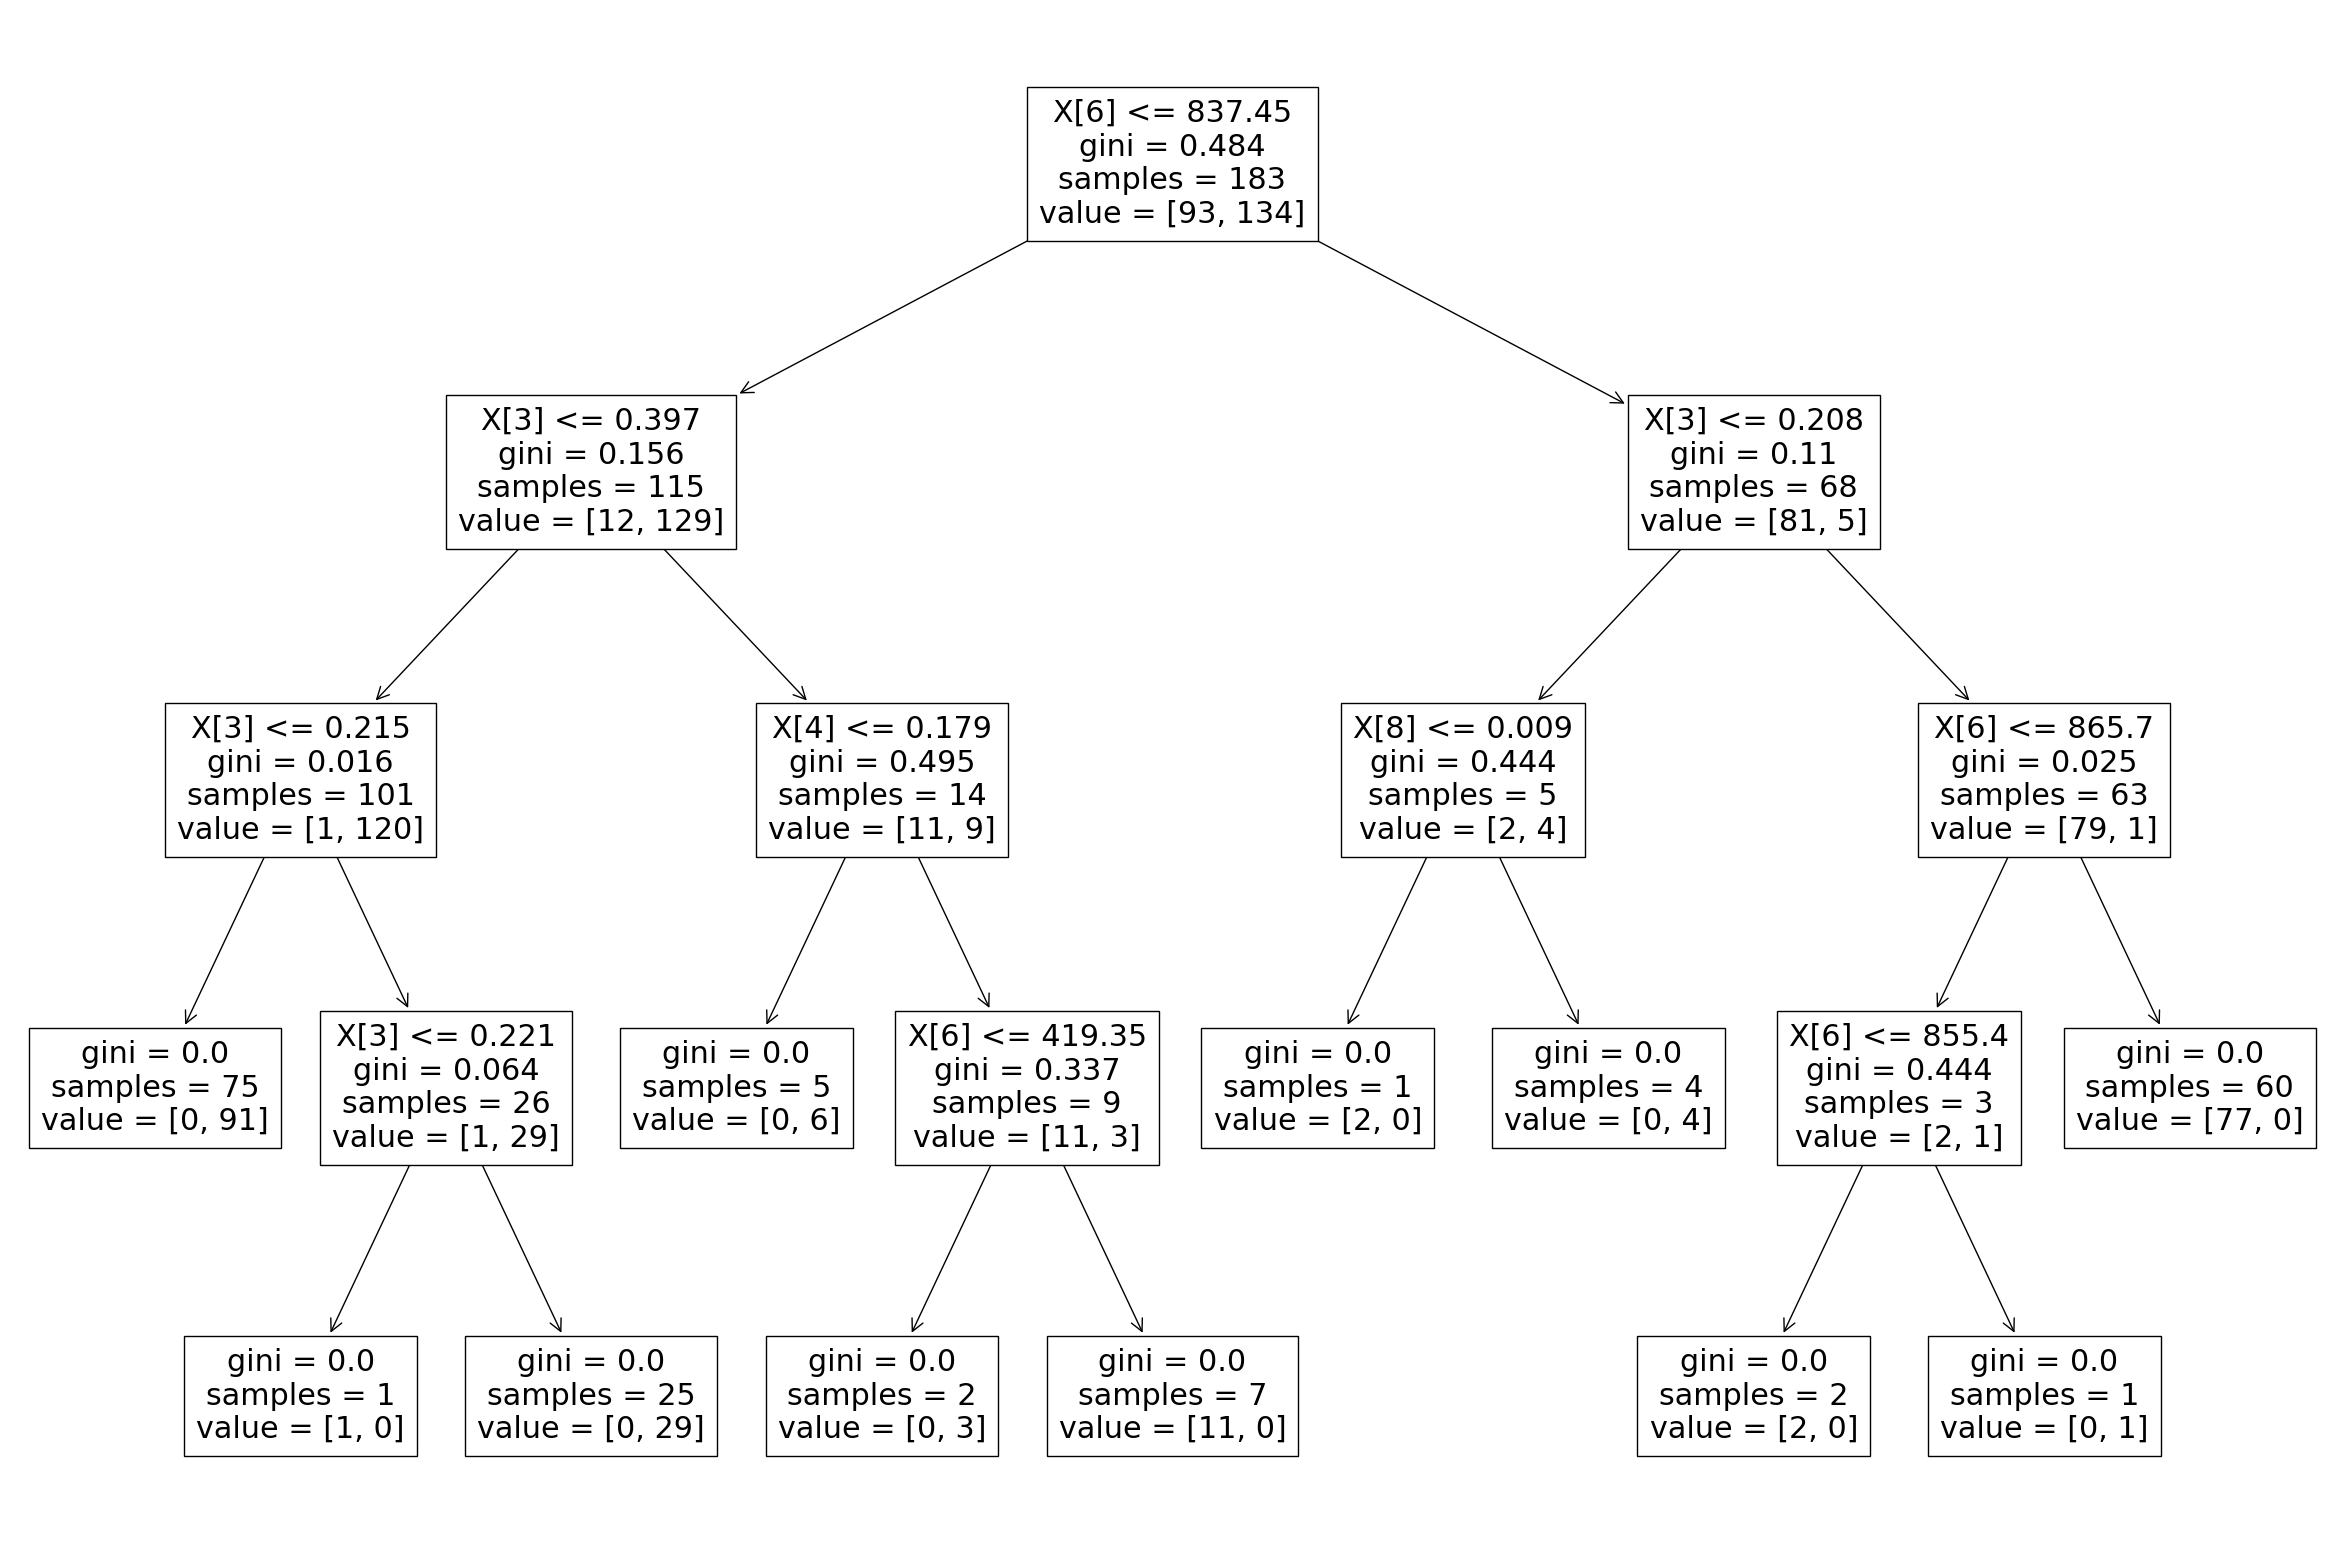

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(best_bc_model.estimators_[0])

# Random Forest
Decision tree는 overfitting될 가능성이 높다는 약점을 갖고 있습니다. 가지치기를 통해 트리의 최대 높이를 설정할 수 있지만 이 방법으로는 overfitting을 충분히 해결할 수 없습니다. 따라서 좀 더 일반화된 트리를 만드는 방법을 만들고자 해서 만들어진 것이 Random forest입니다. 

Random forest는 의사결정나무 기반의 앙상블로 학습데이터를 사용해 여러개의 Decision tree를 만들고 각 tree의 결과를 결합해 예측하는 기법입니다. Random forest는 bagging과 랜덤한 설명변수를 통해 다양성을 확보하게 됩니다. 

sklearn 내장 데이터인 유방암 데이터를 통해서 유방암 여부를 예측, 최적의 하이퍼 파라미터를 찾고 feature 중요도를 계산하였습니다. 


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [27]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=2022)

In [29]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"RandomForestClassifier: {accuracy_score(y_test, y_pred)}")

RandomForestClassifier: 0.956140350877193


Bagging과 마찬가지로 Random Forest의 최적의 hyper parameter 찾기 위해 grid search를 이용하였습니다.

Random Forest의 hyper parameter
- n_estimator: 결정 트리 개수. default는 10이며 많을수록 좋은 성능이 나올 수 있지만 무조건적인 것은 아닙니다.
- max_depth: 트리의 깊이
- min_samples_leaf: leaf노드가 되기 위한 최소한의 샘플 데이터의 수
- min_samples_split: 노드를 분할하기 위한 최소한의 데이터 수

In [30]:
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 16],
    'min_samples_split': [8, 16, 20]
}

In [31]:
rf_model = RandomForestClassifier(random_state=2022, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 50, 100]})

In [32]:
print("최적의 Hyper parameter:", grid_cv.best_params_)

최적의 Hyper parameter: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}


최적의 Hyper parameter를 이용해서 예측에 사용할 Random Forest에 학습시켰으며 예측 결과 0.95의 정확도를 보였습니다.

In [33]:
best_rf_model = RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=8, random_state=2022)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
print(f"예측 정확도: {accuracy_score(y_test, y_pred)}")

예측 정확도: 0.956140350877193


다음은 wine 데이터셋의 랜덤포레스트의 최종 예측에 사용된 의사결정나무중 첫번째의 예시입니다.

[Text(0.578125, 0.9166666666666666, 'X[22] <= 113.15\ngini = 0.471\nsamples = 286\nvalue = [173, 282]'),
 Text(0.40625, 0.75, 'X[24] <= 0.164\ngini = 0.137\nsamples = 186\nvalue = [22, 275]'),
 Text(0.25, 0.5833333333333334, 'X[7] <= 0.05\ngini = 0.062\nsamples = 176\nvalue = [9, 273]'),
 Text(0.125, 0.4166666666666667, 'X[24] <= 0.142\ngini = 0.008\nsamples = 162\nvalue = [1, 256]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 134\nvalue = [0, 216]'),
 Text(0.1875, 0.25, 'X[24] <= 0.142\ngini = 0.048\nsamples = 28\nvalue = [1, 40]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 26\nvalue = [0, 38]'),
 Text(0.375, 0.4166666666666667, 'X[2] <= 88.875\ngini = 0.435\nsamples = 14\nvalue = [8, 17]'),
 Text(0.3125, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 10]'),
 Text(0.4375, 0.25, 'X[5] <= 0.166\ngini = 0.498\nsamples = 8\nvalue = [8, 7]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.32\nsamples = 

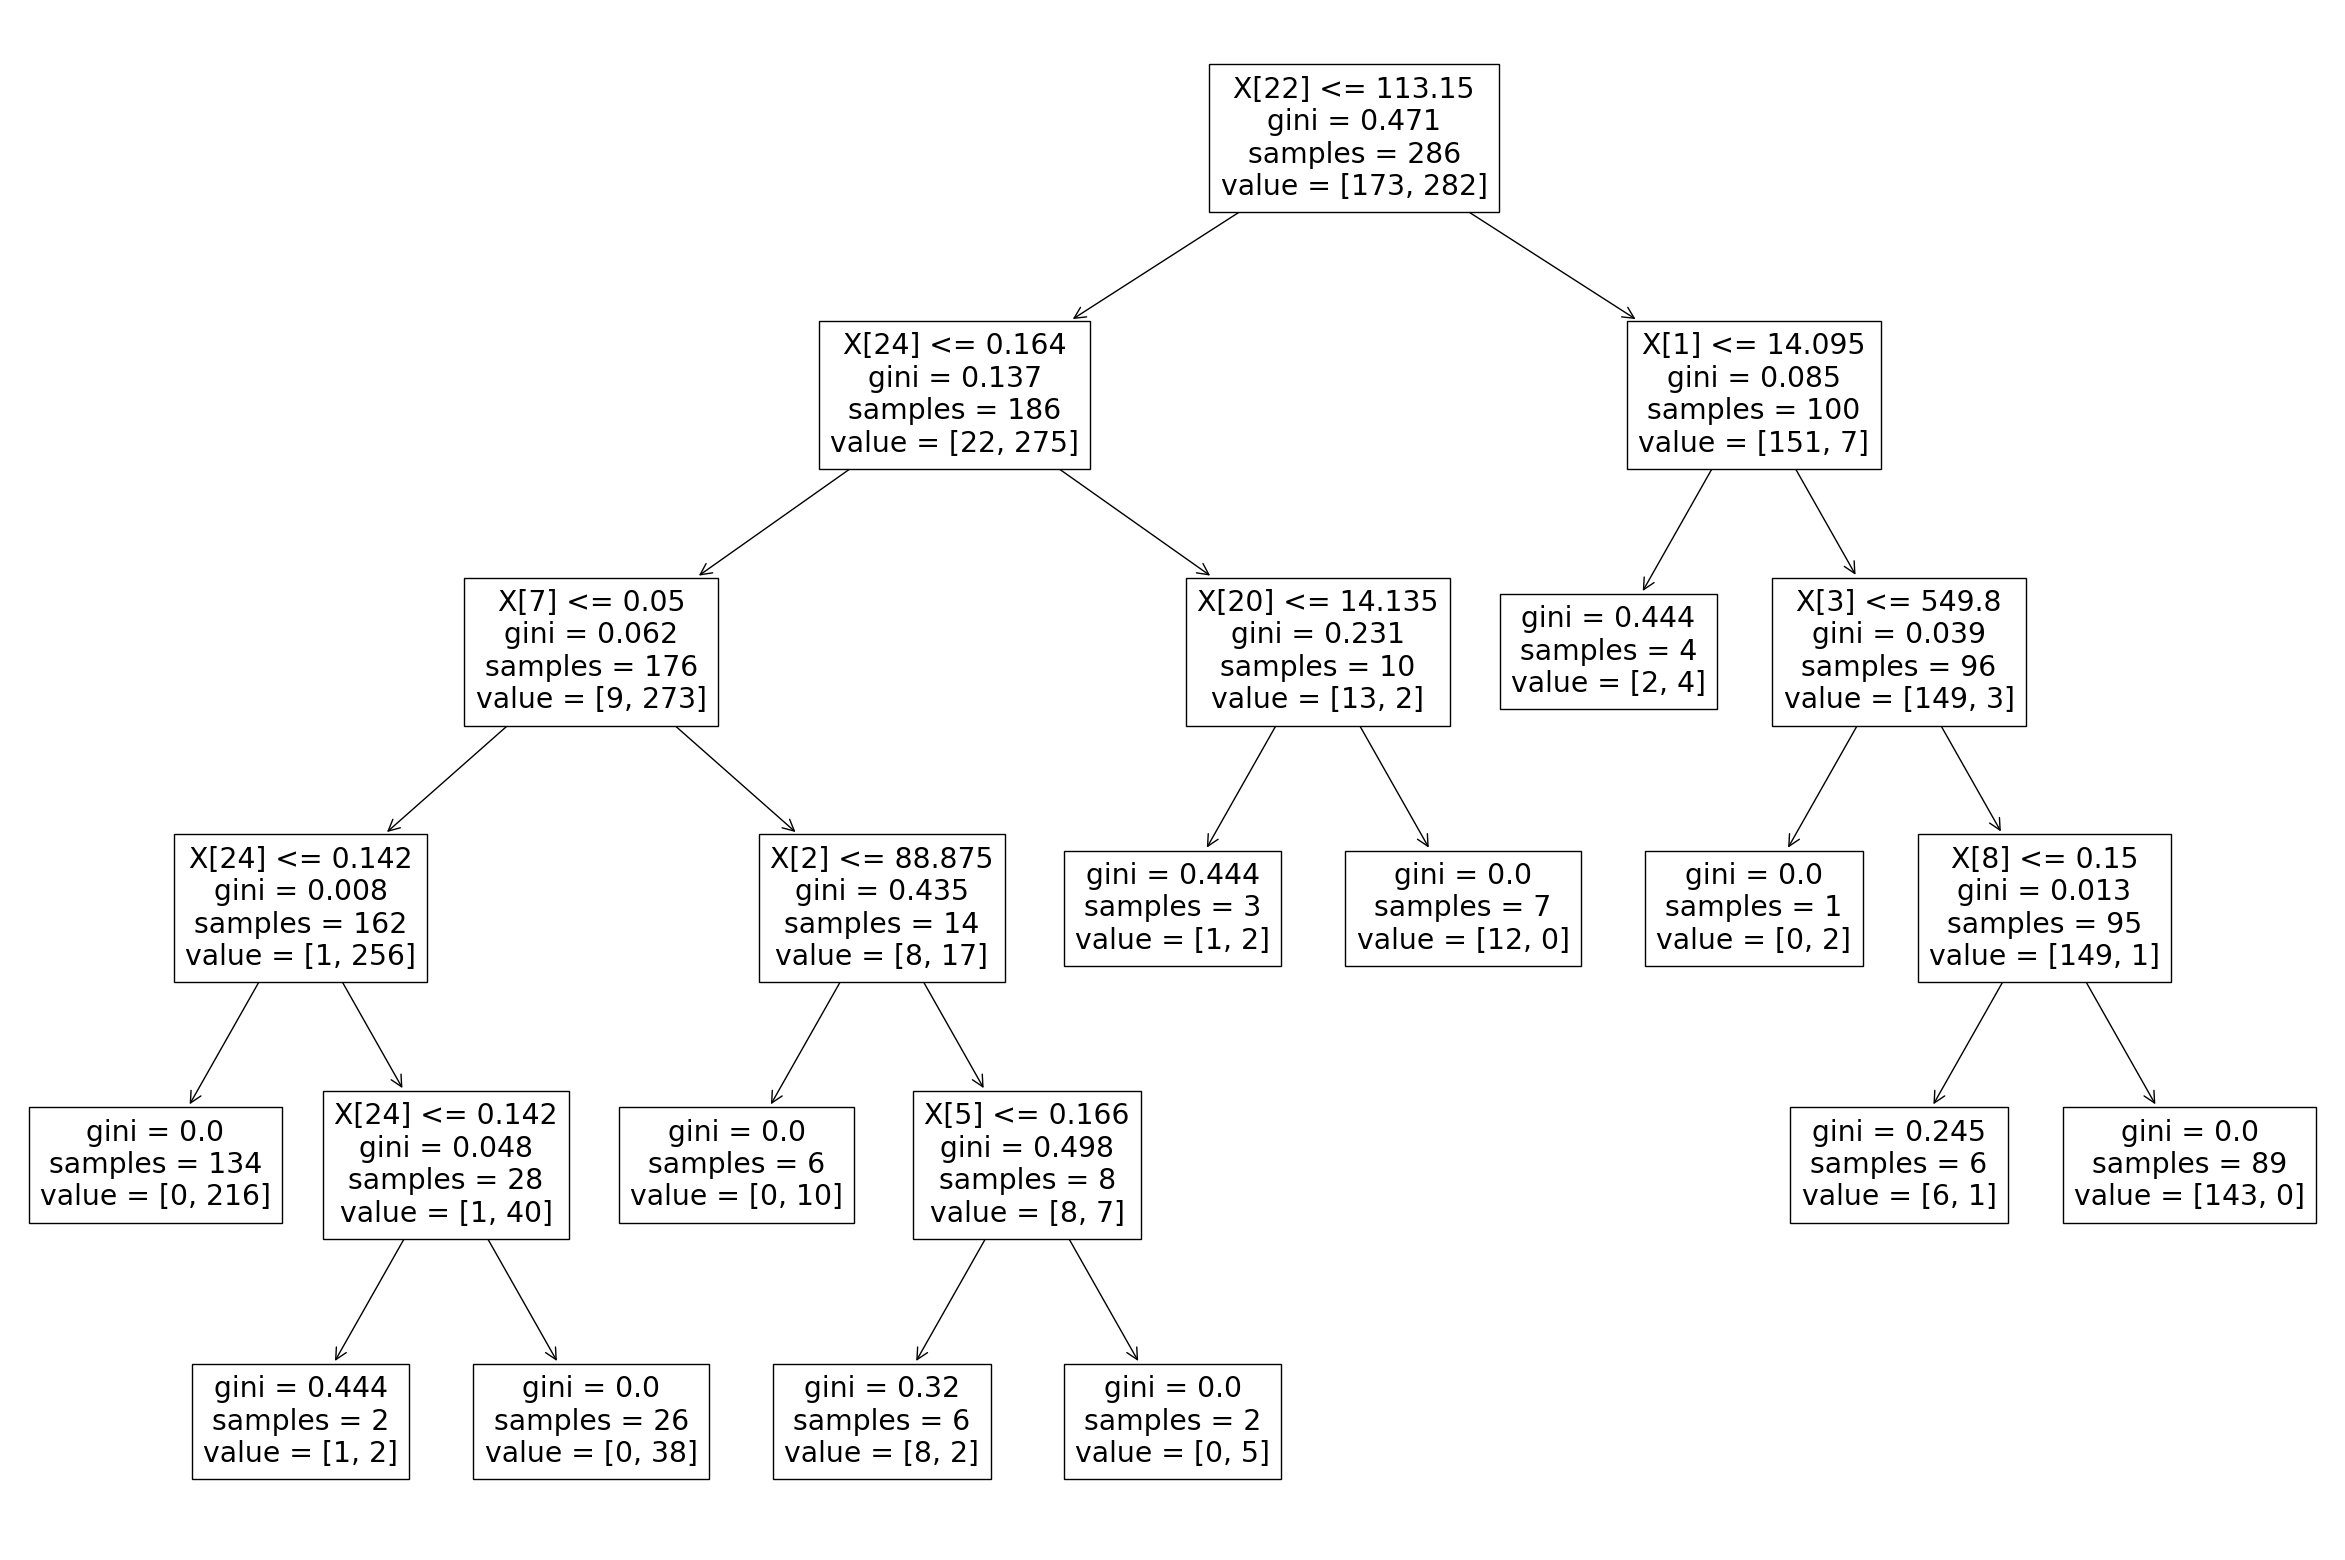

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(best_rf_model.estimators_[0])

In [35]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=2022)

In [37]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"RandomForestClassifier: {accuracy_score(y_test, y_pred)}")

RandomForestClassifier: 0.9649122807017544


In [38]:
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 16],
    'min_samples_split': [8, 16, 20]
}

In [39]:
rf_model = RandomForestClassifier(random_state=2022, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=2022),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 50, 100]})

In [40]:
print("최적의 Hyper parameter:", grid_cv.best_params_)

최적의 Hyper parameter: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}


In [41]:
best_rf_model = RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=8, random_state=2022)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
print(f"예측 정확도: {accuracy_score(y_test, y_pred)}")

예측 정확도: 0.956140350877193


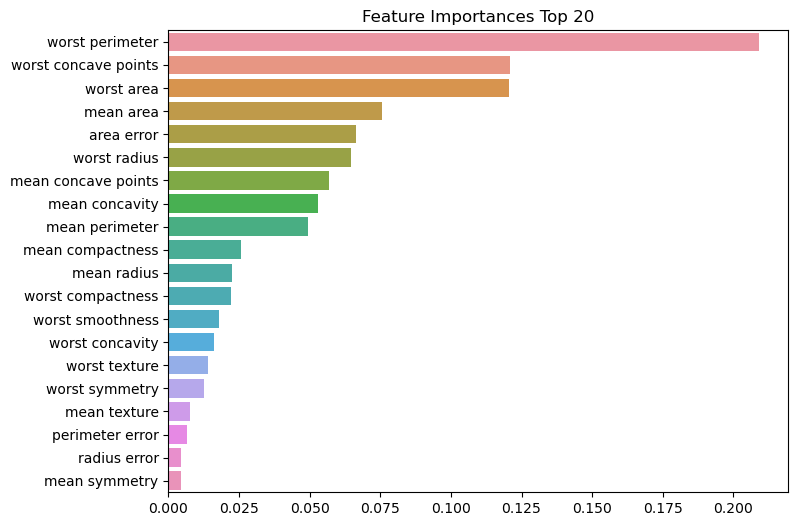

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_importances_values = best_rf_model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=cancer_df.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

Cancer 데이터의 변수 중요도를 그린 결과 유방암 여부에 중요한 변수는 Worst perimeter가 압도적으로 높았으며 worst concave points, worst area가 거의 동일하게 중요했으며 mean area, area error 등이 그 뒤를 이었습니다.

다음은 랜덤포레스트의 최종 예측에 사용된 의사결정나무중 첫번째의 예시입니다.

[Text(0.578125, 0.9166666666666666, 'X[22] <= 113.15\ngini = 0.471\nsamples = 286\nvalue = [173, 282]'),
 Text(0.40625, 0.75, 'X[24] <= 0.164\ngini = 0.137\nsamples = 186\nvalue = [22, 275]'),
 Text(0.25, 0.5833333333333334, 'X[7] <= 0.05\ngini = 0.062\nsamples = 176\nvalue = [9, 273]'),
 Text(0.125, 0.4166666666666667, 'X[24] <= 0.142\ngini = 0.008\nsamples = 162\nvalue = [1, 256]'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 134\nvalue = [0, 216]'),
 Text(0.1875, 0.25, 'X[24] <= 0.142\ngini = 0.048\nsamples = 28\nvalue = [1, 40]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 26\nvalue = [0, 38]'),
 Text(0.375, 0.4166666666666667, 'X[2] <= 88.875\ngini = 0.435\nsamples = 14\nvalue = [8, 17]'),
 Text(0.3125, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 10]'),
 Text(0.4375, 0.25, 'X[5] <= 0.166\ngini = 0.498\nsamples = 8\nvalue = [8, 7]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.32\nsamples = 

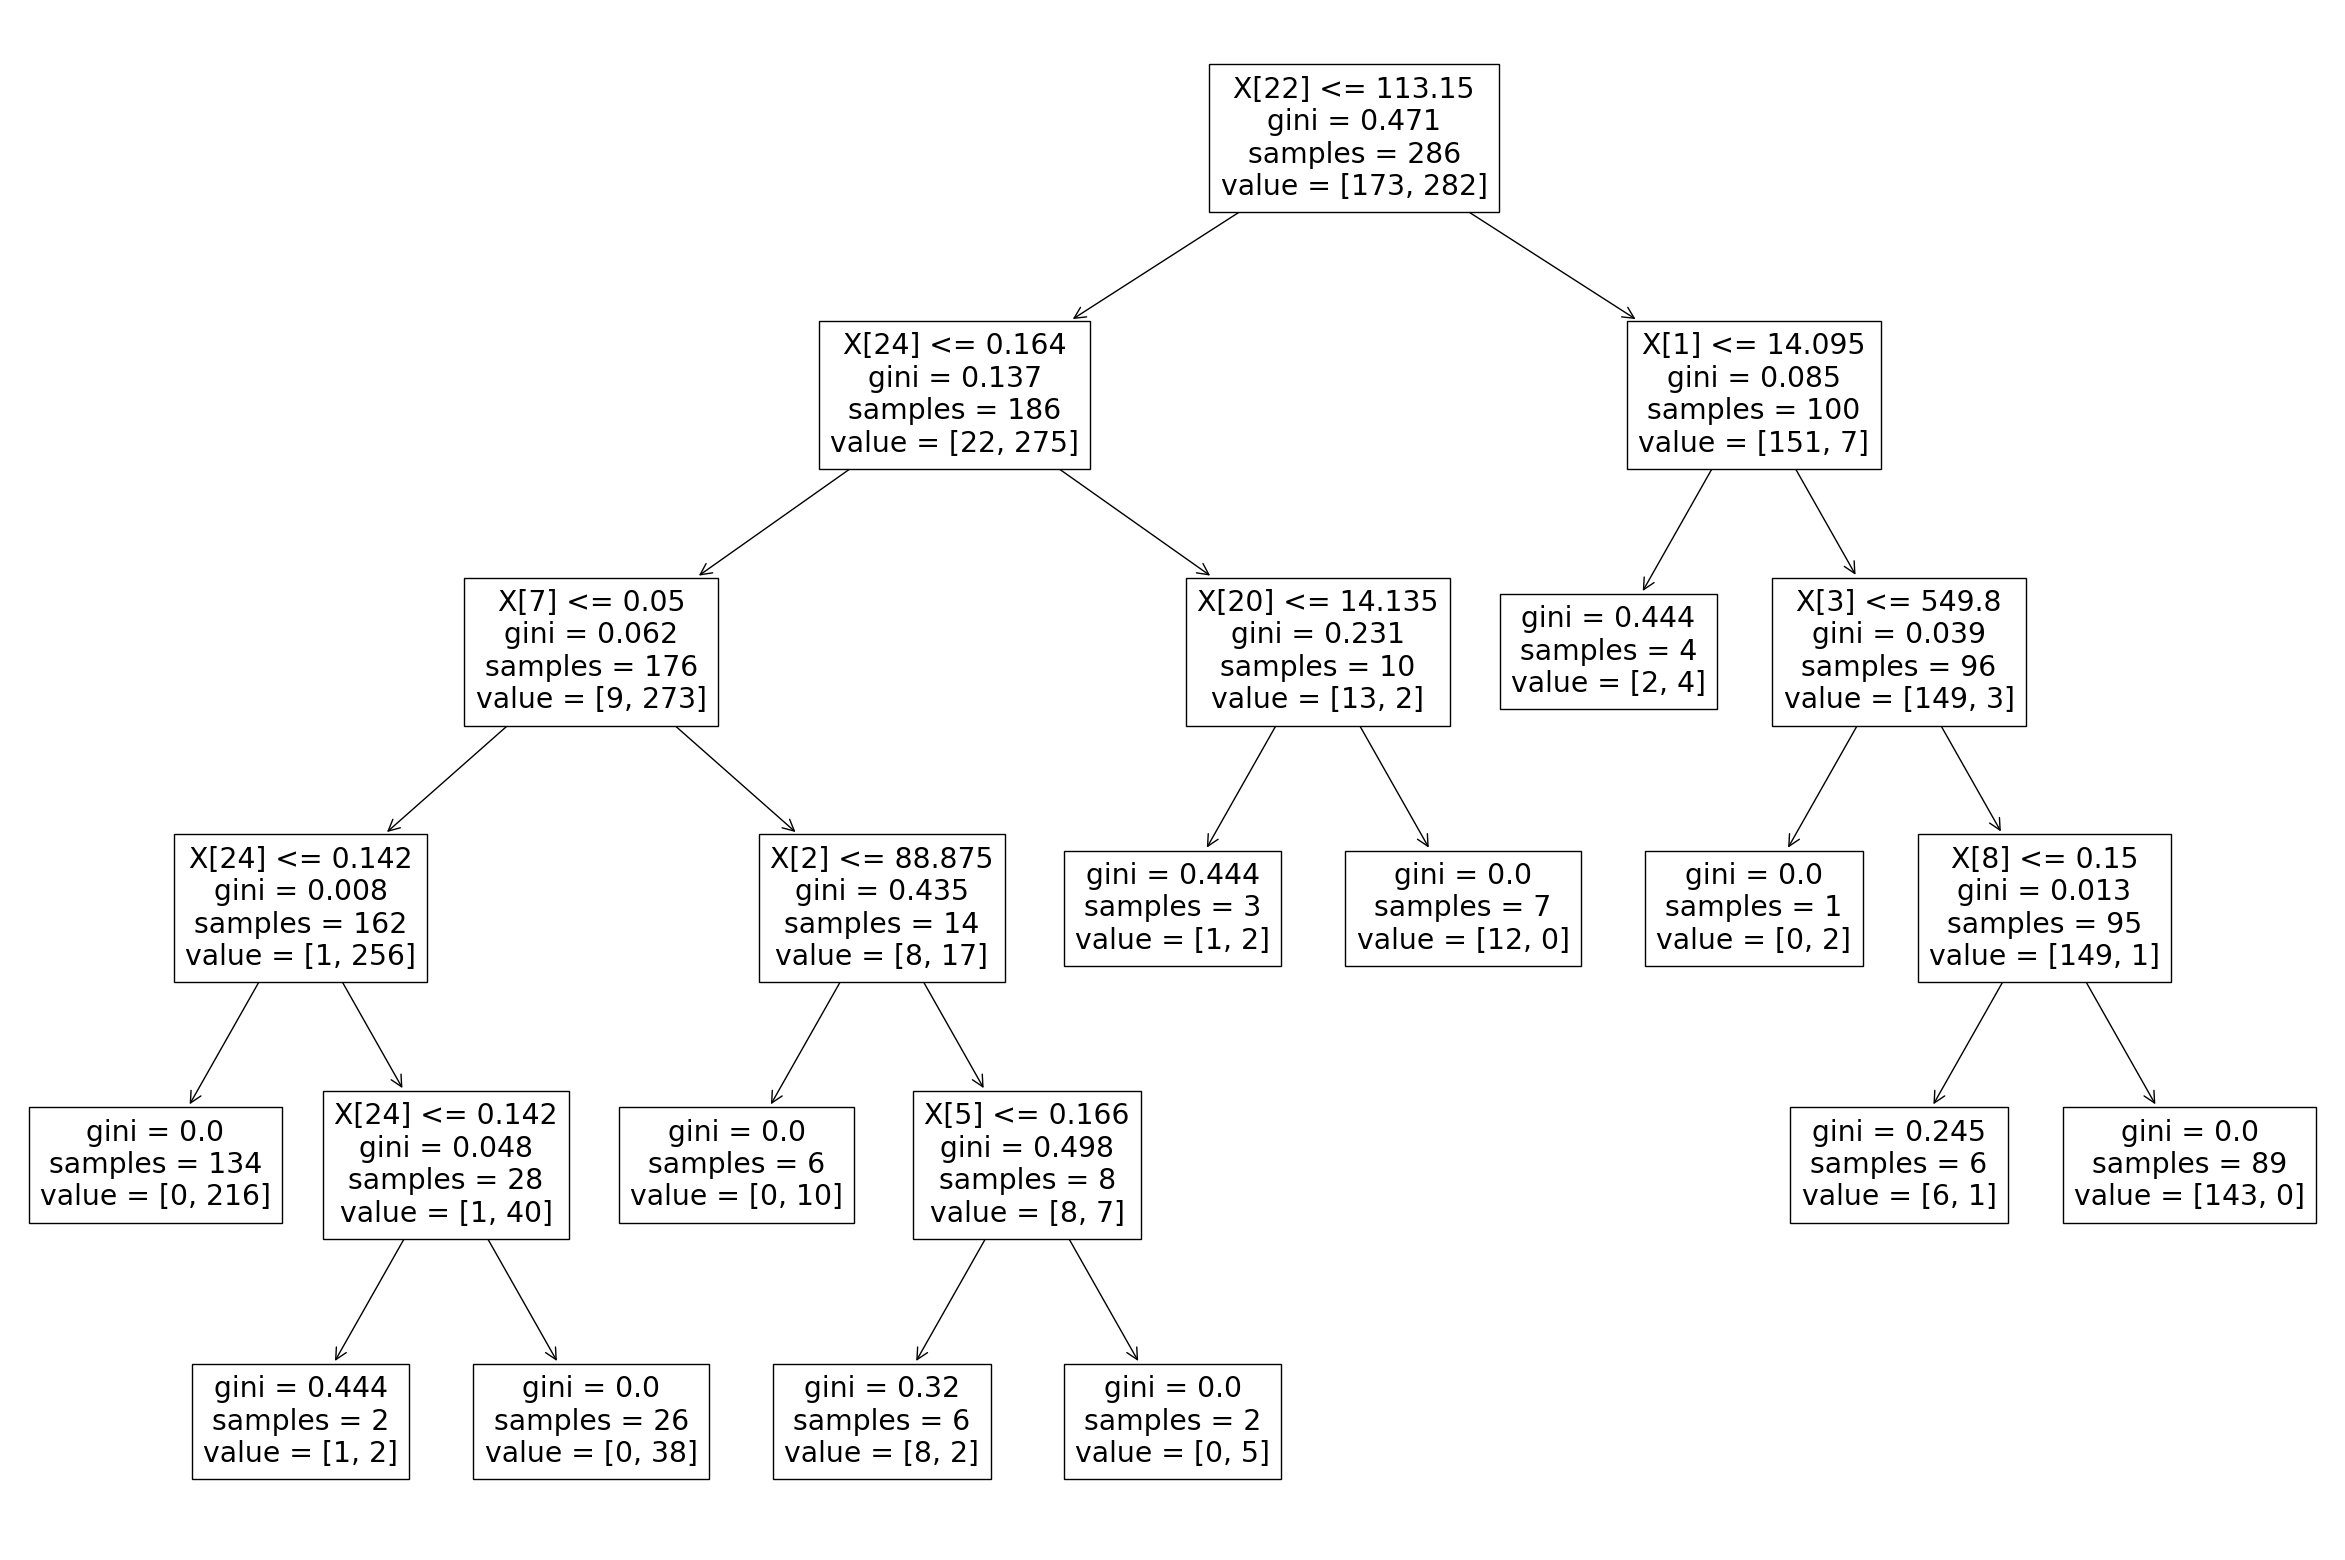

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 20))
plot_tree(best_rf_model.estimators_[0])

----